In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the MNIST dataset -> 0 to 9 handwritten data
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
from keras.models import Sequential
from keras.layers import Flatten,Dense

In [5]:
model=Sequential()

In [6]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

 # Convert the 28x28 Image into a 1D Array
    # Hidden Layer with 128 Units
     #Output Layer with 10 units

In [7]:
# Compile the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5


1875/1875 [==============================] - 9s 4ms/step - loss: 0.2577 - accuracy: 0.9274 - val_loss: 0.1328 - val_accuracy: 0.9603
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1113 - accuracy: 0.9667 - val_loss: 0.1020 - val_accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0774 - accuracy: 0.9773 - val_loss: 0.0924 - val_accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9823 - val_loss: 0.0797 - val_accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0766 - val_accuracy: 0.9769


In [18]:
# Predict the Labels of the test Set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [19]:

y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
# Print the Confusion Matrix
print('Confusion Matrix')
print(cm)
# Calculate the Accuracy
acc=accuracy_score(y_test,y_pred)
# Printing the Accuracy
print('Accuracy :',acc)

Confusion Matrix
[[ 970    1    2    1    1    0    2    1    2    0]
 [   0 1122    6    1    0    1    2    0    3    0]
 [   3    1 1014    1    0    0    3    5    5    0]
 [   0    0    6  994    0    1    0    2    2    5]
 [   0    0    5    0  951    0    6    7    0   13]
 [   2    0    0   11    1  873    3    1    0    1]
 [   3    4    1    1    2    3  944    0    0    0]
 [   1    1   10    2    0    0    0 1006    1    7]
 [   5    2    7    9    4    8    6    5  925    3]
 [   2    3    2   11    7    3    1   10    0  970]]
Accuracy : 0.9769


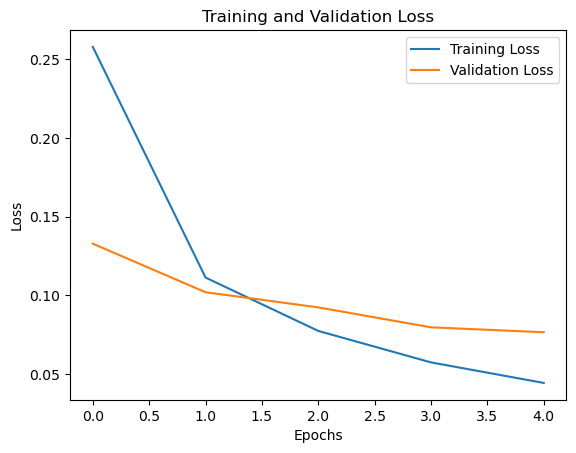

In [21]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

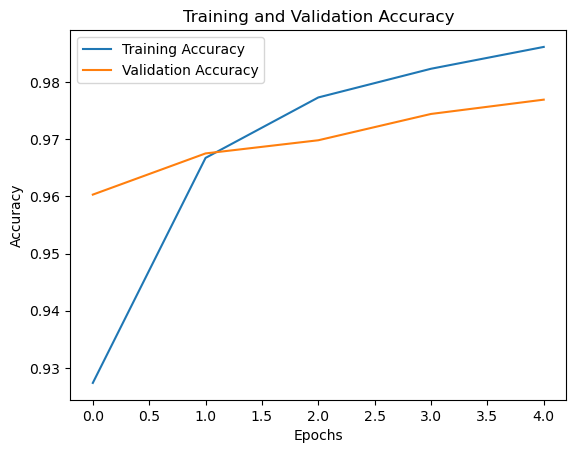

In [22]:
# Plotting the Training and Validation accuracy
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()